In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob

In [3]:
annotators = glob.glob('./*24.csv')
print(annotators)

annotators_dict = {}

for annotator in annotators:
  # annotators_dict[annotator.split('_')[0].split('/')[1]]
  annotators_dict[annotator.split('_')[0][2:]] = pd.read_csv(annotator).replace(',', '.', regex=True)

annotators_dict

sent_distance = pd.read_csv('tweets_with_sentdist.csv')

new_df = pd.DataFrame(annotators_dict['Joely']['ID'])
new_df

for key, value in annotators_dict.items():
  new_df[key] = value['annotation']

new_df = new_df.astype(float)

['./zsofia_30102024.csv', './maiwenn_27102024.csv', './ivo_30102024.csv', './florian_30102024.csv', './Joely_311024.csv', './samba_28102024.csv']


In [4]:
new_df = new_df.join(sent_distance.set_index('ID'), on = 'ID', how = 'inner')

In [5]:
with open('../exp_final/best_threshold.txt') as f:
  best_threshold = float(f.read())

best_threshold


0.374

In [6]:
new_df

,ID,zsofia,maiwenn,ivo,florian,Joely,samba,original_ID,tweet,modified_tweet,sarcastic,rephrase,exp,sentiment_distance
66,2680.0,1.00,1.00,1.00,1.00,1.00,1.00,sign_12246,i love having people in my life that only get ...,i love having people in my life that only get ...,1,i hate that people only contact me when i can ...,exp1,0.832295
91,10982.0,1.00,1.00,1.00,1.00,1.00,1.00,sign_4997,obviously i love having to do all of this all ...,obviously i love having to do all of this all ...,1,obviously i hate having to do all of this all ...,exp1,0.685815
102,14384.0,1.00,1.00,1.00,1.00,1.00,0.75,sign_604,i really love how people have to read the sign...,i really love how people have to read the sign...,1,i cant stand how people have to read the sign ...,exp3,0.702725
113,5265.0,1.00,1.00,1.00,1.00,1.00,0.75,train_90,love getting assignments at 6:25pm on a Friday!!,love getting assignments at 6:25pm on a Friday!!,1,Please do not give me an assignment right befo...,exp2,0.571275
118,4821.0,1.00,1.00,1.00,1.00,1.00,1.00,sign_3549,i absolutely love how my mom doesn't believe a...,i absolutely love how my mom doesn't believe a...,1,i really don't like how my mom doesn't believe...,exp3,0.937303
200,18942.0,1.00,1.00,1.00,1.00,1.00,0.75,train_724,Love everything in my basket selling our befor...,Love everything in my basket selling our befor...,1,I hate everything in my basket selling out bef...,exp2,0.040061
242,19559.0,0.50,0.50,0.50,0.50,0.50,0.50,train_2771,i love my life,i love my life,0,NaN,exp1,0.400570
254,13743.0,0.50,0.75,0.50,0.00,0.25,0.50,train_2657,i love video games,i love video games,0,NaN,exp1,0.313019
282,18711.0,1.00,1.00,1.00,0.75,0.75,0.75,sign_10188,oh how i love going to work,oh how i love going to work,1,i hate working,exp1,0.495860
299,18870.0,1.00,1.00,1.00,1.00,1.00,1.00,sign_4213,i love it when people don't reply,i love it when people don't reply,1,sucks to realise that the espn 3 stream is mor...,exp1,0.831543


In [27]:
cmap_color = 'Spectral'

<ipython-input-29-788d6a576d40>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  s = plt.scatter(x_axis, y_axis, c = ratings, cmap = plt.cm.get_cmap('Spectral', 6))


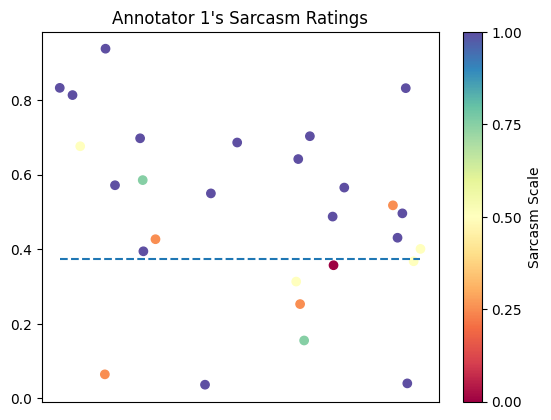

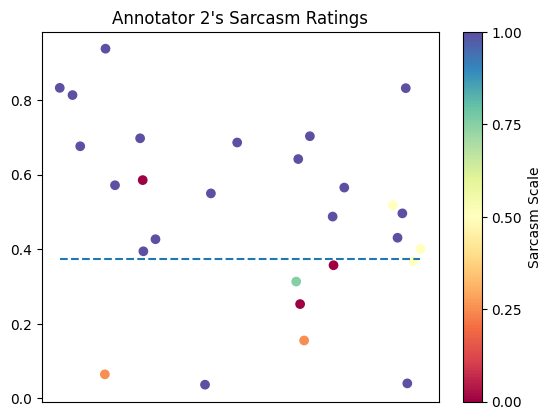

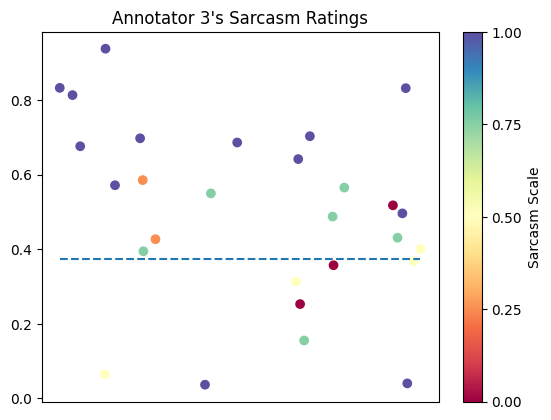

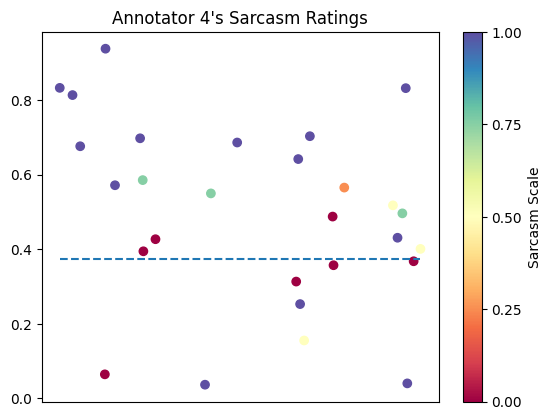

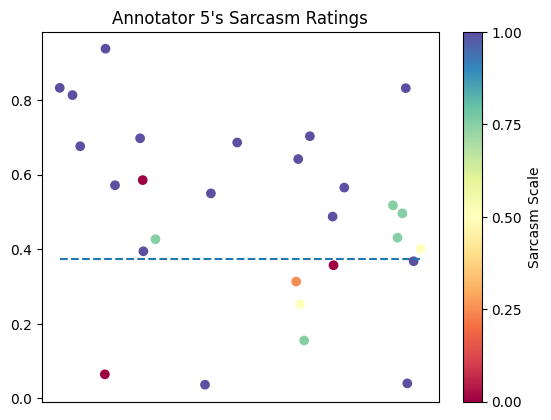

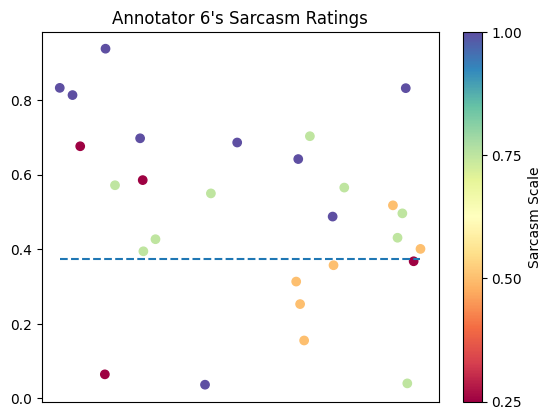

In [29]:
i = 0
for key in annotators_dict:
  i += 1
  ratings = new_df[key]
  x_axis = new_df['ID']
  y_axis = new_df['sentiment_distance']
  s = plt.scatter(x_axis, y_axis, c = ratings, cmap = plt.cm.get_cmap('Spectral', 6))
  cb = plt.colorbar(s, label = 'Sarcasm Scale', ticks = [0.0, 0.25, 0.5, 0.75, 1.0])
  s.set_cmap(cmap_color)
  plt.plot([min(x_axis), max(x_axis)], [best_threshold, best_threshold], linestyle = '--')
  plt.title(f"Annotator {i}'s Sarcasm Ratings")
  plt.xticks([])
  plt.savefig("squares" + str(i) + ".png")
  plt.show()


In [9]:
def checking_values(d):
  new_d = {}
  for key, value in d.items():
    if value not in new_d:
      new_d[value] = [key]
    elif value in new_d:
      new_d[value].append(key)
  return new_d

In [10]:
def get_ranges(l):
  result = []
  i = 0
  while i < len(l):
    start = l[i]
    while i + 1 < len(l) - 1 and l[i] == l[i + 1] - 1:
      i += 1
    end = l[i]
    if start == end:
      result.append(str(start))
    else:
      result.append(f'{start} -> {end}')
    i += 1
  return result

In [11]:
correct = 0.0
step = 0.001
threshold_list = np.arange(0.0, 1.0, step)

for key in annotators_dict:
  acc_thres_dict = {}
  annotator_ratings = new_df[key]
  for threshold in threshold_list:
    threshold_labels = []
    for index, row in new_df.iterrows():
      if row['sentiment_distance'] > threshold:
        threshold_labels.append(1)
      elif row['sentiment_distance'] <= threshold:
        threshold_labels.append(0)
    sum_score = sum((1 - abs(i - j)) for i, j in zip(annotator_ratings, threshold_labels))
    acc_thres_dict[threshold] = (sum_score / 28)
    reorg = checking_values(acc_thres_dict)
  # print(reorg)
  # print(f"{key}'s max accuracy is {max(checking_values(acc_thres_dict).items(), key = lambda x: x[0])}")
  # print(f"{key}, highest accuracy: {max(reorg)}, thresholds {get_ranges(reorg[max(reorg)])}")
  print(f"{key}, highest accuracy: {max(reorg)}, thresholds {reorg[max(reorg)][-1]}")

zsofia, highest accuracy: 0.7678571428571429, thresholds 0.036000000000000004
maiwenn, highest accuracy: 0.7946428571428571, thresholds 0.394
ivo, highest accuracy: 0.7142857142857143, thresholds 0.036000000000000004
florian, highest accuracy: 0.75, thresholds 0.495
Joely, highest accuracy: 0.7857142857142857, thresholds 0.367
samba, highest accuracy: 0.7053571428571429, thresholds 0.036000000000000004


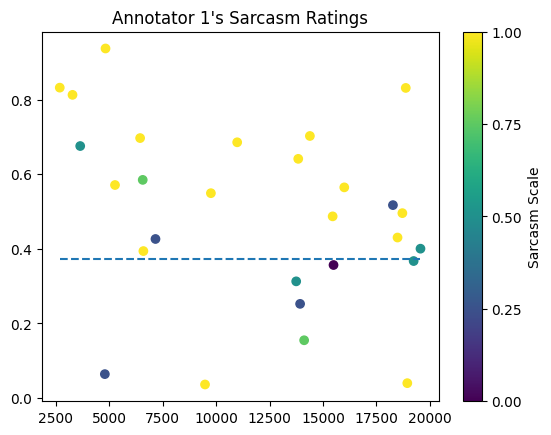

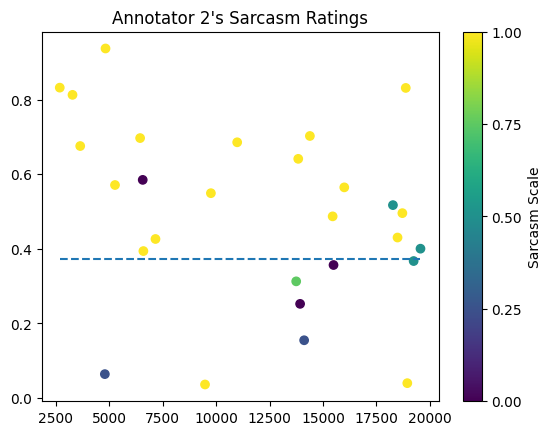

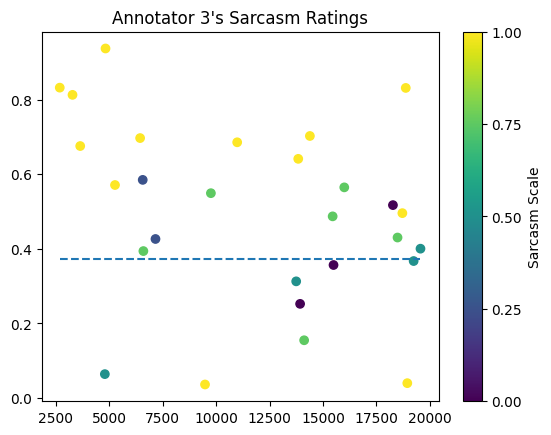

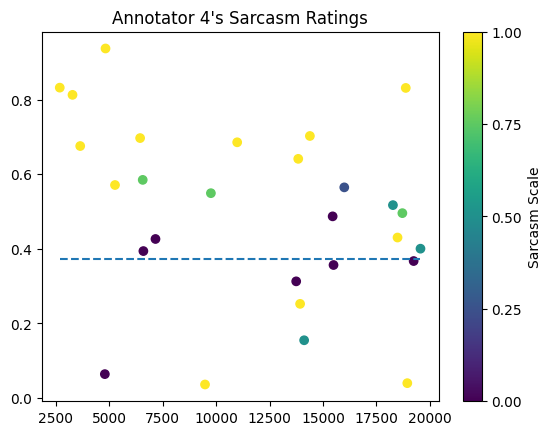

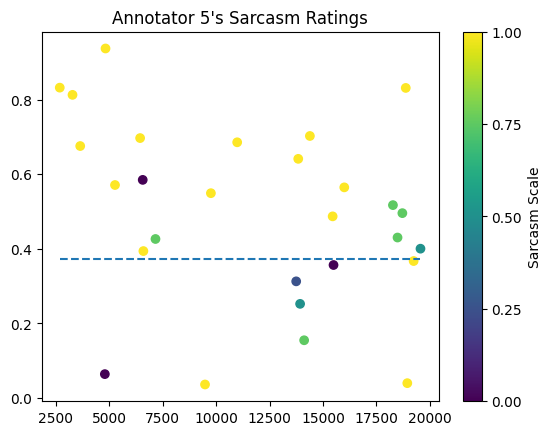

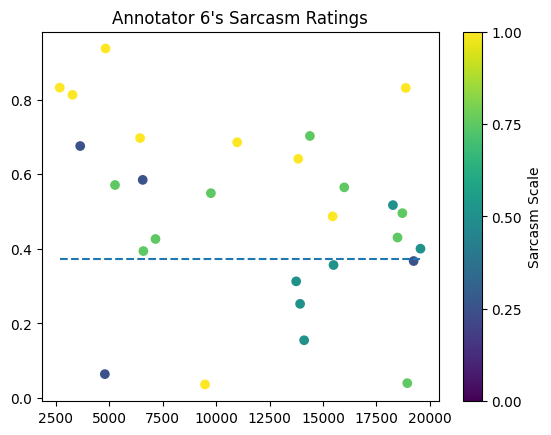

In [23]:
i = 0
for key in annotators_dict:
  i += 1
  ratings = new_df[key]
  x_axis = new_df['ID']
  y_axis = new_df['sentiment_distance']
  plt.scatter(x_axis, y_axis, c = plt.colormaps['viridis'](ratings))
  s.set_cmap(cmap_color)
  plt.plot([min(x_axis), max(x_axis)], [best_threshold, best_threshold], linestyle = '--')
  cb = plt.colorbar(label = 'Sarcasm Scale', ticks = [0.0, 0.25, 0.5, 0.75, 1.0])
  plt.title(f"Annotator {i}'s Sarcasm Ratings")
  plt.show()
